<a href="https://colab.research.google.com/github/melika-bol/credit-card-fraud-detection/blob/main/credit_card_fraud_detection_MODELING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O features.py https://raw.githubusercontent.com/melika-bol/credit-card-fraud-detection/main/features.py

--2025-06-27 18:30:41--  https://raw.githubusercontent.com/melika-bol/credit-card-fraud-detection/main/features.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248 [text/plain]
Saving to: ‘features.py’

features.py         100%[===================>]     248  --.-KB/s    in 0s      

2025-06-27 18:30:41 (4.14 MB/s) - ‘features.py’ saved [248/248]



In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"melikaabadi","key":"87afcde48a1f15d849ec1cb8a49c936d"}'}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)
csv_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_path)

Path to dataset files: /kaggle/input/creditcardfraud


In [5]:
df['is_small_amount'] = (df['Amount'] <= 2125.87).astype(int)
df['log_amount'] = np.log1p(df['Amount'])

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,is_small_amount,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,2.397895


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Class']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [8]:
strat_test_set["Class"].value_counts() / len(strat_test_set)

,count
Class,
0,0.99828
1,0.00172


In [9]:
df = strat_train_set.copy()

<Axes: xlabel='Class', ylabel='Amount'>

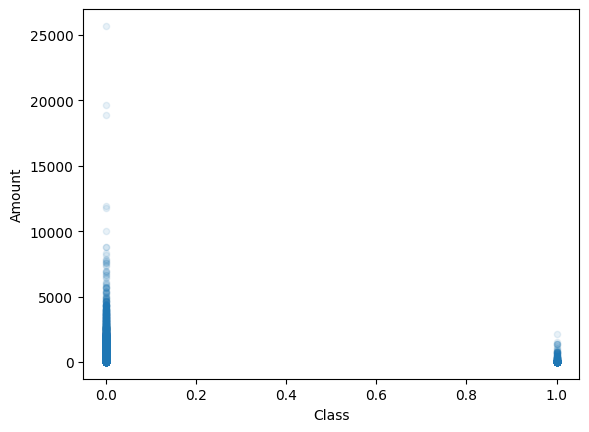

In [10]:
df.plot(kind='scatter', x='Class', y='Amount', alpha=0.1)

In [11]:
corr = df.corr()
corr['Amount'].sort_values(ascending=False)

,Amount
Amount,1.000000
log_amount,0.548568
V7,0.398941
V20,0.333663
V6,0.217895
V21,0.102266
V4,0.099970
V18,0.036066
V27,0.033727
V14,0.032659


array([[<Axes: xlabel='Amount', ylabel='Amount'>,
        <Axes: xlabel='Class', ylabel='Amount'>,
        <Axes: xlabel='Time', ylabel='Amount'>,
        <Axes: xlabel='V7', ylabel='Amount'>],
       [<Axes: xlabel='Amount', ylabel='Class'>,
        <Axes: xlabel='Class', ylabel='Class'>,
        <Axes: xlabel='Time', ylabel='Class'>,
        <Axes: xlabel='V7', ylabel='Class'>],
       [<Axes: xlabel='Amount', ylabel='Time'>,
        <Axes: xlabel='Class', ylabel='Time'>,
        <Axes: xlabel='Time', ylabel='Time'>,
        <Axes: xlabel='V7', ylabel='Time'>],
       [<Axes: xlabel='Amount', ylabel='V7'>,
        <Axes: xlabel='Class', ylabel='V7'>,
        <Axes: xlabel='Time', ylabel='V7'>,
        <Axes: xlabel='V7', ylabel='V7'>]], dtype=object)

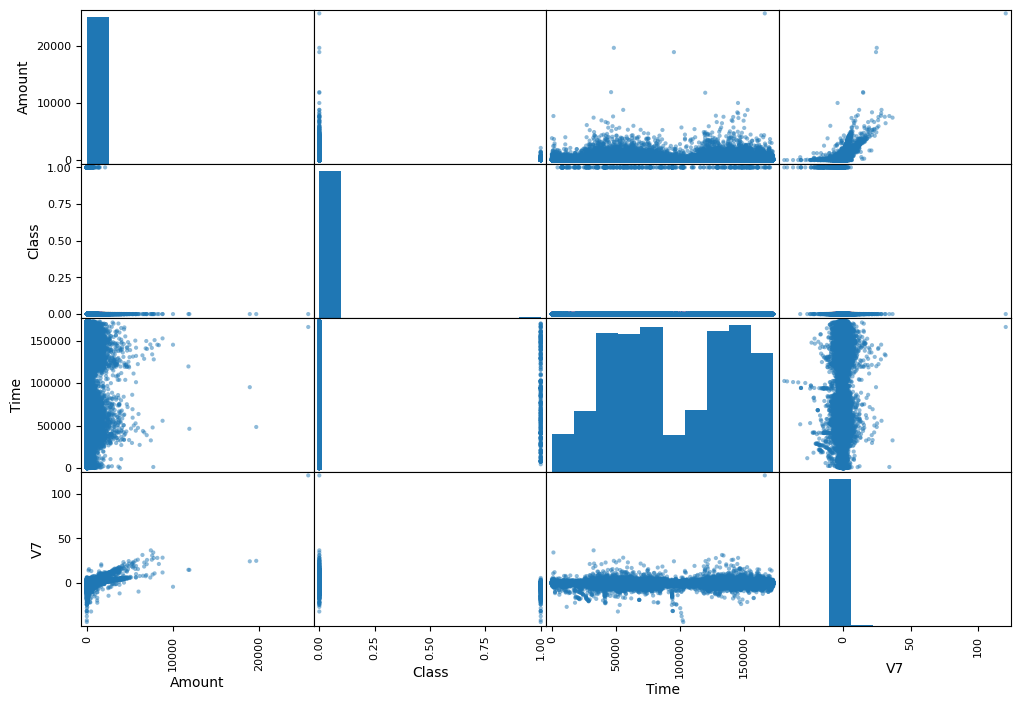

In [12]:
from pandas.plotting import scatter_matrix

attributes = ['Amount', 'Class', 'Time', 'V7']
scatter_matrix(df[attributes], figsize=(12, 8))

In [15]:
x_train = strat_train_set.drop("Class", axis=1)
y_train = strat_train_set["Class"].copy()

x_test = strat_test_set.drop("Class", axis=1)
y_test = strat_test_set["Class"].copy()

# Model

In [16]:
# Features V1 to V28 were generated with pca, so they were previously scaled.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[['Amount']] = scaler.fit_transform(x_train[['Amount']])
x_test[['Amount']] = scaler.transform(x_test[['Amount']])

Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_classifier.fit(x_train, y_train)
y_pred_tree = tree_classifier.predict(x_train)

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_classifier, x_train, y_train, scoring='accuracy', cv=10)

In [27]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("std: ", scores.std())

In [28]:
display_scores(scores)

Scores:  [0.99903445 0.99916612 0.99934167 0.99877112 0.99894668 0.99881496
 0.99925386 0.99934164 0.99920997 0.99938553]
Mean:  0.9991266008600794
std:  0.00021180284660811605


In [30]:
from sklearn.metrics import classification_report

y_pred = tree_classifier.predict(x_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9995    0.9996    0.9995     56864
           1     0.7396    0.7245    0.7320        98

    accuracy                         0.9991     56962
   macro avg     0.8696    0.8620    0.8658     56962
weighted avg     0.9991    0.9991    0.9991     56962



In [31]:
from sklearn.metrics import roc_auc_score

y_proba = tree_classifier.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.8620250752242372
